From the analysis of the data, we can make a few observations about the different drug regimens. First off, we can see that Ramicane is the most promising of the drugs in regards to lowering the tumor volume. After the study, Ramicane had the lowest average tumor size as compared to the other drugs. Another observation we can make is gender does not necessarily have an effect on the effectiveness of the drug, the study roughly had a 50% distribution of both male and female mice. According to the data, neither sex had an advantage when it came to decreasing the tumor volume. Lastly, we can observe that the weight of the mouse has a rather strong influence on the size of the tumor volume. With a r-value of 0.84, we can infer that as long as we can keep the mice under a certain weight, we might be able to keep the tumor volume from increasing. 

In [211]:
#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [212]:
#loading in the data
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

#reading in the data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#merging the data set togehter 
combined_data_df = pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID')

#cleaning up the data
combined_data_df.drop_duplicates(keep = 'first')


combined_data_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [213]:
#grouping the data by drug regimen 
drug_regimen_tumor_vol = combined_data_df.groupby("Drug Regimen")

#gathering stats results 
stats_summary = drug_regimen_tumor_vol.agg({'Tumor Volume (mm3)': ['mean', 'median','std','var', 'sem']})
stats_summary.head(15)

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.322552  50.854632  6.507770  42.351070  0.512884
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

Text(0.5, 1.0, 'Mice per Drug Regimen')

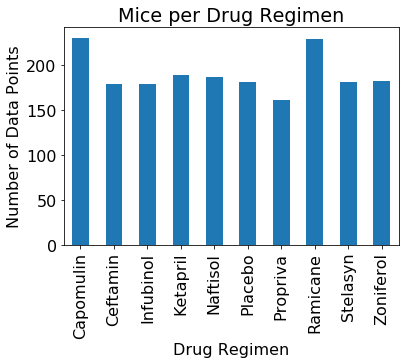

In [214]:
#grouping data by regimen to get number of data points for each drug
drug_regimen_tumor_vol = combined_data_df.groupby("Drug Regimen")
drug_count = pd.DataFrame(drug_regimen_tumor_vol ['Drug Regimen'].count())


#creating plot using Pandas .plot
#plotting data in a bar graphg and addling labels
drug_per_mouse = combined_data_df.groupby("Drug Regimen")['Mouse ID'].count().plot(kind='bar')
drug_per_mouse.set_ylabel("Number of Data Points")
plt.title("Mice per Drug Regimen")





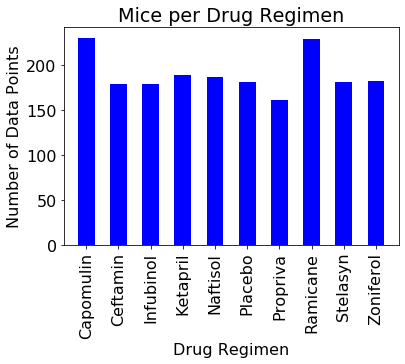

In [215]:
#creating plot using matplotlib .plt
#gather drug names for x axis
x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

 # Create the plot and set x and y limits and labels 
plt.bar(x_axis, drug_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_count.index), rotation="vertical")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_count["Drug Regimen"])*1.05)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice per Drug Regimen")
plt.show()

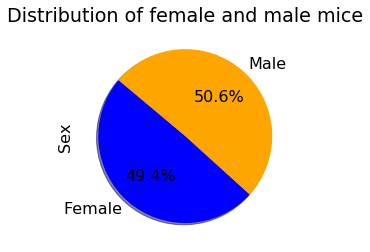

In [216]:
#gather mouse gender count for use in pie chart using PANDAS .plot
mouse_gender = combined_data_df.groupby('Sex')
mouse_gender_count = pd.DataFrame(mouse_gender['Sex'].count())
mouse_gender_count.head()

# Create a pie chart based off of the group series from before
mouse_gender_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female and male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["blue","orange"],legend =False)

plt.show()

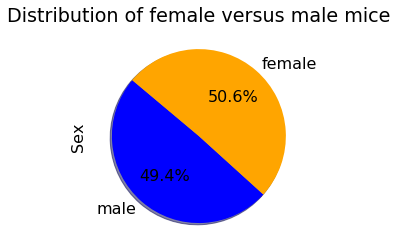

In [217]:
# Get Labels for our pie chart 
genders = ['male', 'female']
# The values of each section of the pie chart
gender_counts = mouse_gender_count['Sex']
colors = ['blue', 'orange']
# Creates the pie chart based upon the values above

plt.pie(gender_counts, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()

In [218]:
# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = combined_data_df[combined_data_df['Drug Regimen'].isin(four_drug_list)]
four_drugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [219]:
#group the data by drug regimen and mouse id to find the quartiles and bounds 
final_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)
final_tumor
final_tumor_unstack =final_tumor.stack(level=0).unstack(level=0)

final_tumor_unstack.head()

counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"                                      ")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The data below {lower_bound} for {drug} are possible outliers.")
    print(f"The data above {upper_bound} for {drug} are possible outliers.")
    print(f"                                                        ")
    counter += 1

                                      
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The data below 20.71 for Capomulin are possible outliers.
The data above 51.83 for Capomulin are possible outliers.
                                                        
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The data below 17.91 for Ramicane are possible outliers.
The data above 54.31 for Ramicane are possible outliers.
                                                        
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The data below 36.83 for Infubinol are possible outliers.
The data above 82.75 for Infubinol are possible outliers.
                                              

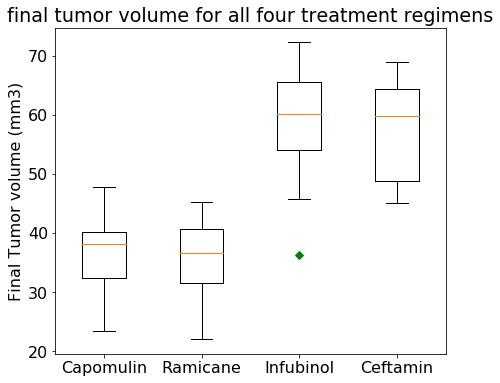

In [220]:
#create a list of the drugs for the box plots and add in each drug
boxplot_list = []
for drug in four_drug_list:
    boxplot_list.append(list(final_tumor_unstack[drug].dropna()))

#generate plot and format properly
fig1, ax = plt.subplots(figsize=(7,6))
ax.set_ylabel('Final Tumor volume (mm3)')
plt.title("final tumor volume for all four treatment regimens")
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

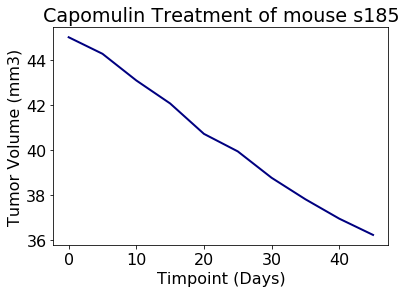

In [225]:
#find the data for capomulin and a mouse to plot the effevtiveness of the drug over time
capomulin = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
capomulin.head()
capomulin_time_tumor = capomulin.groupby(['Timepoint']).agg(\
                        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean))

#generate plot and format                    
mouse_plot = capomulin_time_tumor.plot(lw=2, colormap='jet', markersize=10, title='Capomulin Treatment of mouse s185', legend = False)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timpoint (Days)")
plt.show

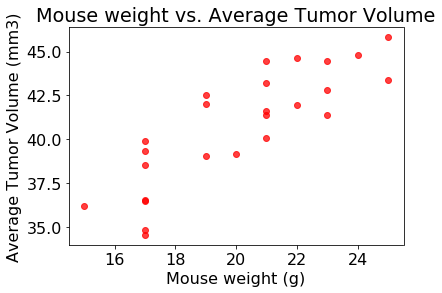

In [222]:
#gather data for weight and tumor volume average 
capomulin_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        Mouse_weight=('Weight (g)', np.mean),\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
                        )

#create scatter plot for mouse weight vs tumor volume
plt.scatter(capomulin_mouse_id['Mouse_weight'],capomulin_mouse_id['Tumor_vol_mean'], marker='o',facecolors='red', alpha=.75)
plt.title("Mouse weight vs. Average Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [223]:
#calculate and print out the correlation for Capomulin
correlation = st.pearsonr(capomulin_mouse_id['Mouse_weight'],capomulin_mouse_id['Tumor_vol_mean'])
print(f"The correlation between mouse weight and the average tumor volume {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume 0.84


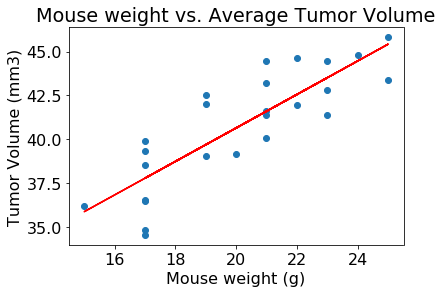

In [224]:
#print out scatter plot with liner regression line 
x_values = capomulin_mouse_id['Mouse_weight']
y_values = capomulin_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse weight vs. Average Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()